In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
nf = pd.read_csv('project1/netflix_titles.csv')

In [3]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [4]:
nf.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [5]:
nf.isnull().sum()/len(nf)

show_id         0.000000
type            0.000000
title           0.000000
director        0.315849
cast            0.091434
country         0.076355
date_added      0.001765
release_year    0.000000
rating          0.001604
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

In [6]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [7]:
nf.drop('description',axis=1,inplace=True)

# deal with type

In [8]:
nf['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

# deal with title

In [9]:
nf['title'].value_counts()

Oh My Ghost                     3
The Silence                     3
Love                            3
Limitless                       3
Tunnel                          3
                               ..
The Bare-Footed Kid             1
Last Night                      1
Hasta los dientes               1
Hard Tide                       1
Mowgli: Legend of the Jungle    1
Name: title, Length: 6172, dtype: int64

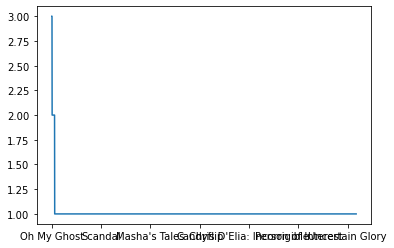

In [10]:
nf['title'].value_counts().plot()

In [11]:
# 有重名的現象
nf['title'].value_counts()[nf['title'].value_counts()==3]

Oh My Ghost    3
The Silence    3
Love           3
Limitless      3
Tunnel         3
Name: title, dtype: int64

In [12]:
nf['title'].value_counts()[nf['title'].value_counts()==2]

Skins                                     2
Rosario Tijeras                           2
Hostages                                  2
Life                                      2
Carrie                                    2
The Innocents                             2
The Gift                                  2
The Code                                  2
Charmed                                   2
The Oath                                  2
Kakegurui                                 2
Solo                                      2
Aquarius                                  2
Lovesick                                  2
Tiger                                     2
Lavender                                  2
The Saint                                 2
She's Gotta Have It                       2
Bleach                                    2
Zoom                                      2
Top Boy                                   2
Zoo                                       2
The In-Laws                     

In [13]:
nf[nf['title']== 'Oh My Ghost']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
1155,80993625,TV Show,Oh My Ghost,NaN,"Nuengthida Sophon, Keerati Mahaprukpong, Arak ...",Thailand,"November 21, 2018",2018,TV-MA,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
2865,81000015,Movie,Oh My Ghost,Poj Arnon,"Kohtee Aramboy, Sudarat Butrprom, Yingsak Chon...",Thailand,"July 25, 2018",2009,TV-14,94 min,"Comedies, Horror Movies, International Movies"
4740,80178404,TV Show,Oh My Ghost,NaN,"Park Bo-young, Cho Jung-seok, Lim Ju-hwan, Kim...",South Korea,"August 8, 2019",2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman..."


# deal with director

In [14]:
# 同個組合出現數次
nf['director'].value_counts()

Raúl Campos, Jan Suter     18
Marcus Raboy               14
Jay Karas                  13
Jay Chapman                12
Martin Scorsese             9
                           ..
Aniruddha Roy Chowdhury     1
Stephen Gyllenhaal          1
Peter DeLuise               1
Ahmad Samir Farag           1
Norberto López Amado        1
Name: director, Length: 3301, dtype: int64

In [15]:
count = 0
director_amount_list = []
for i in nf['director']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    director_amount_list.append(comma_amount)
print(count)
nf['director_count'] = director_amount_list
nf.head()

13


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,director_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",2
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,1
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,1


In [16]:
d_count = 0
for i in nf['director']:
    if 'Raúl Campos' in str(i):
        d_count = d_count+1
print(d_count)
# directors group might change

20


In [17]:
for i in range(count):
    nf[f'director{i+1}']= ''
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,


In [18]:
for i,d_index in zip(nf['director'],range(len(nf))):
    directors = str(i).split(',')
    for t in range(len(directors)):
        nf.iloc[d_index,12+t] = directors[t].strip()
        

nf.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,director4,director5,director6,director7,director8,director9,director10,director11,director12,director13
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,


# deal with cast

In [19]:
nf['cast'].value_counts()
# 同個組合出現數次

David Attenborough                                                                                                                                                          18
Samuel West                                                                                                                                                                 10
Jeff Dunham                                                                                                                                                                  7
Craig Sechler                                                                                                                                                                6
Bill Burr                                                                                                                                                                    5
                                                                                                                             

In [20]:
count = 0
cast_amount_list = []
for i in nf['cast']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    cast_amount_list.append(comma_amount)
print(count)
nf['cast_count'] = cast_amount_list
nf.head()

50


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,director5,director6,director7,director8,director9,director10,director11,director12,director13,cast_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,10
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,1
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,12
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,8
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,12


In [21]:
for i in range(count):
    nf[f'cast{i+1}']= ''
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,cast41,cast42,cast43,cast44,cast45,cast46,cast47,cast48,cast49,cast50
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,


In [22]:
for i,d_index in zip(nf['cast'],range(len(nf))):
    casts = str(i).split(',')
    for t in range(len(casts)):
        nf.iloc[d_index,26+t] = casts[t].strip()
        

nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,cast41,cast42,cast43,cast44,cast45,cast46,cast47,cast48,cast49,cast50
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,


# deal with country

In [23]:
nf['country'].value_counts()

United States                                       2032
India                                                777
United Kingdom                                       348
Japan                                                176
Canada                                               141
                                                    ... 
Germany, Italy                                         1
United Kingdom, Norway, Denmark, Germany, Sweden       1
Argentina, Chile, Peru                                 1
United Kingdom, United States, Czech Republic          1
Cambodia, United States                                1
Name: country, Length: 554, dtype: int64

In [24]:
count = 0
country_amount_list = []
for i in nf['country']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    country_amount_list.append(comma_amount)
print(count)
nf['country_count'] = country_amount_list
nf.head()

12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,cast42,cast43,cast44,cast45,cast46,cast47,cast48,cast49,cast50,country_count
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,4
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,1
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,1


In [25]:
for i in range(count):
    nf[f'country{i+1}']= ''
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,,,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,


In [26]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'director_count',
       'director1', 'director2', 'director3', 'director4', 'director5',
       'director6', 'director7', 'director8', 'director9', 'director10',
       'director11', 'director12', 'director13', 'cast_count', 'cast1',
       'cast2', 'cast3', 'cast4', 'cast5', 'cast6', 'cast7', 'cast8', 'cast9',
       'cast10', 'cast11', 'cast12', 'cast13', 'cast14', 'cast15', 'cast16',
       'cast17', 'cast18', 'cast19', 'cast20', 'cast21', 'cast22', 'cast23',
       'cast24', 'cast25', 'cast26', 'cast27', 'cast28', 'cast29', 'cast30',
       'cast31', 'cast32', 'cast33', 'cast34', 'cast35', 'cast36', 'cast37',
       'cast38', 'cast39', 'cast40', 'cast41', 'cast42', 'cast43', 'cast44',
       'cast45', 'cast46', 'cast47', 'cast48', 'cast49', 'cast50',
       'country_count', 'country1', 'country2', 'country3', 'country4',
       'country5', 'coun

In [27]:
for i,d_index in zip(nf['country'],range(len(nf))):
    countries = str(i).split(',')
    for t in range(len(countries)):
        nf.iloc[d_index,-12+t] = countries[t].strip()
        

nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,...,South Korea,China,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,...,,,,,,,,,,


# deal with dateadded

In [28]:
nf[['date_added']].replace('nan',np.nan)

,date_added
0,"September 9, 2019"
1,"September 9, 2016"
2,"September 8, 2018"
3,"September 8, 2018"
4,"September 8, 2017"
...,...
6229,NaN
6230,NaN
6231,NaN
6232,NaN


In [29]:
nf['date_added'][:-11] = nf['date_added'][:-11].apply(lambda x: datetime.datetime.strptime(x.strip(), '%B %d, %Y').strftime("%Y/%m/%d"))


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [30]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019/09/09,2019,TV-PG,90 min,...,South Korea,China,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016/09/09,2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018/09/08,2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018/09/08,2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017/09/08,2017,TV-14,99 min,...,,,,,,,,,,


# deal with year

In [31]:
sorted_year = nf['release_year'].unique()
sorted_year.sort()
sorted_year


array([1925, 1942, 1943, 1944, 1945, 1946, 1947, 1954, 1955, 1956, 1958,
       1959, 1960, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020])

In [32]:
nf[nf['release_year']==1925]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
4292,81030762,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,2018/12/30,1925,TV-PG,1 Season,...,,,,,,,,,,


In [33]:
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019/09/09,2019,TV-PG,90 min,...,South Korea,China,,,,,,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016/09/09,2016,TV-MA,94 min,...,,,,,,,,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018/09/08,2013,TV-Y7-FV,1 Season,...,,,,,,,,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018/09/08,2016,TV-Y7,1 Season,...,,,,,,,,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017/09/08,2017,TV-14,99 min,...,,,,,,,,,,


# deal with list_in

In [34]:
nf['listed_in'].value_counts()

Documentaries                                                             299
Stand-Up Comedy                                                           273
Dramas, International Movies                                              248
Dramas, Independent Movies, International Movies                          186
Comedies, Dramas, International Movies                                    174
                                                                         ... 
Action & Adventure, Anime Features, Children & Family Movies                1
Independent Movies                                                          1
Action & Adventure, Children & Family Movies, Independent Movies            1
British TV Shows, International TV Shows, Stand-Up Comedy & Talk Shows      1
Classic Movies, Comedies, Sports Movies                                     1
Name: listed_in, Length: 461, dtype: int64

In [35]:
count = 0
listed_in_amount_list = []
for i in nf['listed_in']:
    comma_amount = len(str(i).split(','))
    if comma_amount > count:
        count = comma_amount
    listed_in_amount_list.append(comma_amount)
print(count)
nf['listed_in_amount'] = listed_in_amount_list
nf.head()

3


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country4,country5,country6,country7,country8,country9,country10,country11,country12,listed_in_amount
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019/09/09,2019,TV-PG,90 min,...,China,,,,,,,,,2
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016/09/09,2016,TV-MA,94 min,...,,,,,,,,,,1
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018/09/08,2013,TV-Y7-FV,1 Season,...,,,,,,,,,,1
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018/09/08,2016,TV-Y7,1 Season,...,,,,,,,,,,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017/09/08,2017,TV-14,99 min,...,,,,,,,,,,1


In [36]:
for i in range(count):
    nf[f'listed_in{i+1}']= ''
nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country7,country8,country9,country10,country11,country12,listed_in_amount,listed_in1,listed_in2,listed_in3
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019/09/09,2019,TV-PG,90 min,...,,,,,,,2,,,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016/09/09,2016,TV-MA,94 min,...,,,,,,,1,,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018/09/08,2013,TV-Y7-FV,1 Season,...,,,,,,,1,,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018/09/08,2016,TV-Y7,1 Season,...,,,,,,,1,,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017/09/08,2017,TV-14,99 min,...,,,,,,,1,,,


In [37]:
for i,d_index in zip(nf['listed_in'],range(len(nf))):
    listed_in = str(i).split(',')
    for t in range(len(listed_in)):
        nf.iloc[d_index,-3+t] = listed_in[t].strip()
        

nf.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,country7,country8,country9,country10,country11,country12,listed_in_amount,listed_in1,listed_in2,listed_in3
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019/09/09,2019,TV-PG,90 min,...,,,,,,,2,Children & Family Movies,Comedies,
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016/09/09,2016,TV-MA,94 min,...,,,,,,,1,Stand-Up Comedy,,
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018/09/08,2013,TV-Y7-FV,1 Season,...,,,,,,,1,Kids' TV,,
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018/09/08,2016,TV-Y7,1 Season,...,,,,,,,1,Kids' TV,,
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017/09/08,2017,TV-14,99 min,...,,,,,,,1,Comedies,,


# Questions

# 1. movie/tvshow by year
- netflix started increasing the numbers of movies and tv shows in 2015.
- the increacement of movies is larger

In [244]:
nf['add_year'] = nf['date_added'].apply(lambda x: str(x).split('/')[0] if x !=None else None)

In [245]:
nf['count'] = 1
movie = nf[nf['type']=='Movie']['add_year'].value_counts()
tv_show = nf[nf['type']=='TV Show']['add_year'].value_counts()

In [246]:
movie = movie.reset_index()
movie.rename(columns={'index':'add_year','add_year':'count'},inplace=True)
movie.reset_index(drop=True)
movie.drop(movie[movie['add_year']=='nan'].index,inplace=True)
movie = movie.sort_values('add_year')

In [247]:
tv_show = tv_show.reset_index()
tv_show.rename(columns={'index':'add_year','add_year':'count'},inplace=True)
tv_show.reset_index(drop=True)
tv_show = tv_show.sort_values('add_year')
tv_show.drop(tv_show[tv_show['add_year']=='nan'].index,inplace=True)

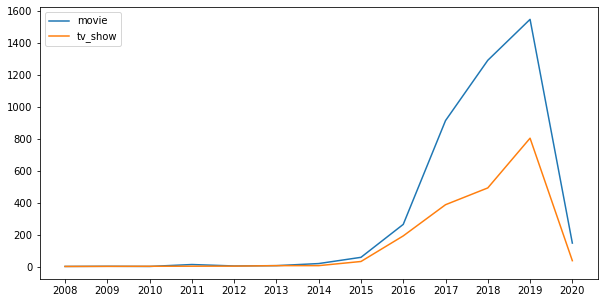

In [248]:
plt.figure(figsize= (10,5))
plt.plot(movie['add_year'],movie['count'],label = 'movie')
plt.plot(tv_show['add_year'],tv_show['count'],label='tv_show')
plt.legend()

In [ ]:

# 2. listed_in by country
# 3. rating by country
# 4. rating by year
# 5. famous cast in tv shows/movie

In [208]:
sns.lineplot('add_year','count',movie)

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: Could not interpret value `count` for parameter `y`

In [170]:
movie

,add_year,count
0,2019,1546
1,2018,1290
2,2017,913
3,2016,264
4,2020,147
5,2015,58
6,2014,19
7,2011,13
8,2013,6
9,2012,4


ValueError: No axis named add_year for object type Series

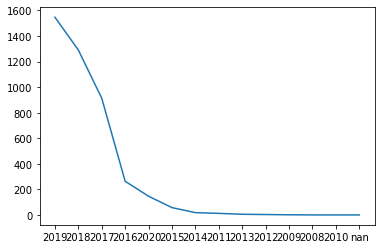

In [107]:
plt.plot(movie)
plt.xticks(temp['add_year'].sort_values('add_year').unique())